In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_ori = cv2.imread('lenna.jpg', 1)
#img_ori = cv2.imread(r'C:/Users/24586/Desktop/whale.png', 1)
img_gray = cv2.imread('lenna.jpg', 0)
img_ori.shape

(500, 500, 3)

In [3]:
cv2.imshow('lenna', img_ori)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

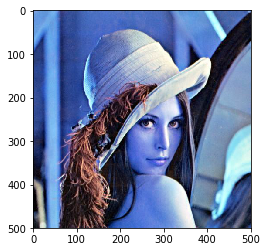

In [4]:
plt.imshow(img_ori)
plt.show()

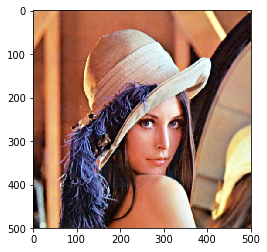

In [5]:
plt.imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

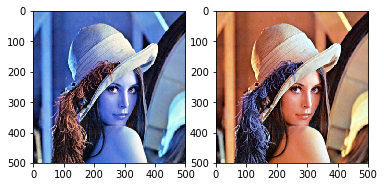

In [7]:
plt.subplot(121)
plt.imshow(img_ori)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
def my_show(img, size=(2,2)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

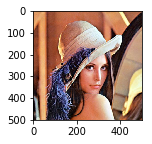

In [9]:
my_show(img_ori)

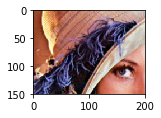

In [10]:
img_crop = img_ori[150:300, 100:300]
my_show(img_crop)

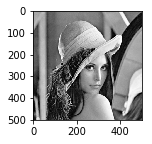

In [11]:
plt.figure(figsize=(2,2))
plt.imshow(img_gray, cmap='gray')
plt.show()

In [12]:
B, G, R = cv2.split(img_ori)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

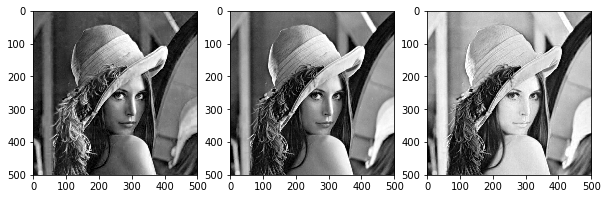

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(B, cmap='gray')
plt.subplot(132)
plt.imshow(G, cmap='gray')
plt.subplot(133)
plt.imshow(R, cmap='gray')
plt.show()

In [14]:
def img_cooler(img, b_increase, r_decrease):
    B, G, R = cv2.split(img)
    b_lim = 255 - b_increase
    B[B > b_lim] = 255
    B[B <= b_lim] = (b_increase + B[B <= b_lim]).astype(img.dtype)
    r_lim = 0 + r_decrease
    R[R < r_lim] = 0
    R[R >= r_lim] = (-r_decrease + R[R >= r_lim]).astype(img.dtype)
    return cv2.merge((B, G, R))

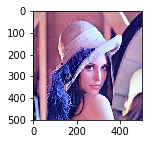

In [15]:
img_cooler1 = img_cooler(img_ori, 60, 10)
#plt.imshow(img_cooler)
#plt.show()
my_show(img_cooler1)

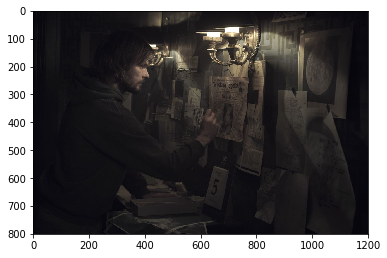

In [16]:
img_dark = cv2.imread('dark.jpg')
my_show(img_dark, size=(6, 6))

In [17]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img_dark, table)

In [18]:
x = ((2/255)**0.5)*255
print(x)

22.58317958127243


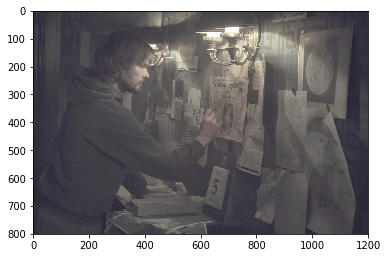

In [19]:
img_brighter = adjust_gamma(img_dark, 2)
my_show(img_brighter, size=(6, 6))

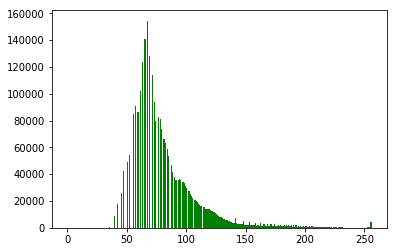

In [20]:
plt.hist(img_brighter.flatten(), 256, [0, 256], color='g')
plt.show()

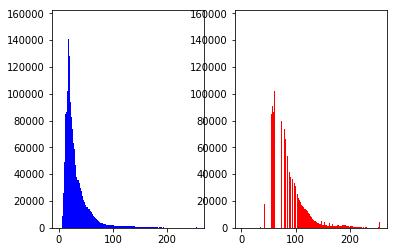

In [21]:
plt.subplot(121)
plt.hist(img_dark.flatten(), 256, [0, 256], color='b')
plt.subplot(122)
plt.hist(img_brighter.flatten(), 256, [0, 256], color='r')
plt.show()

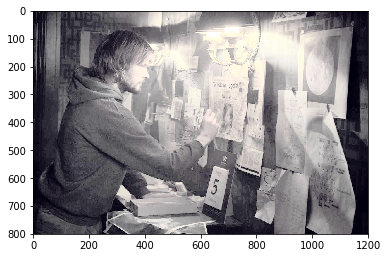

In [22]:
img_yuv = cv2.cvtColor(img_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])  #only for one channel
#convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
my_show(img_output, size=(6, 6))

## HSV

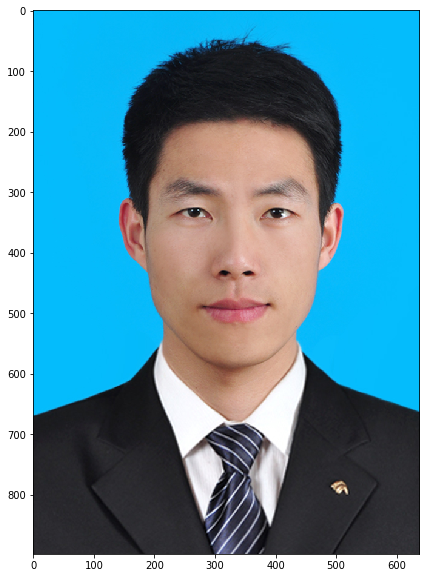

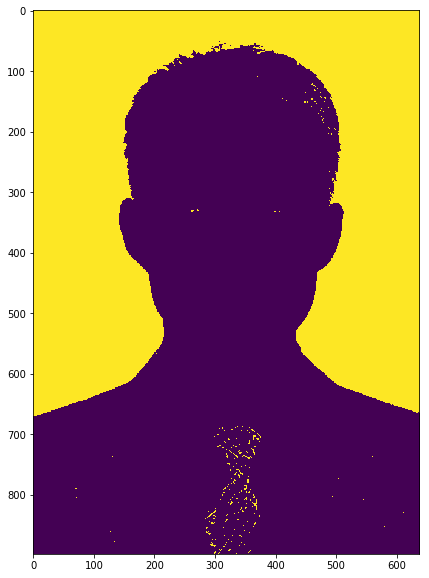

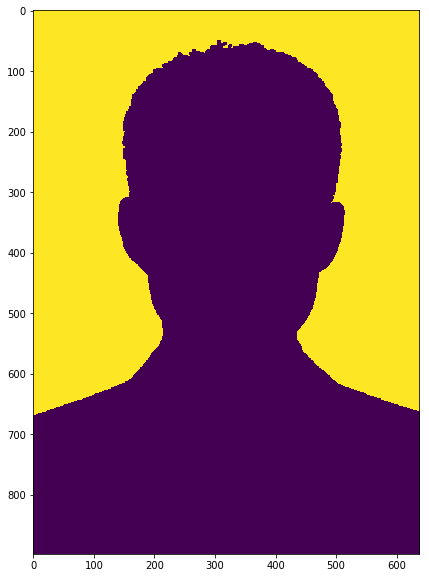

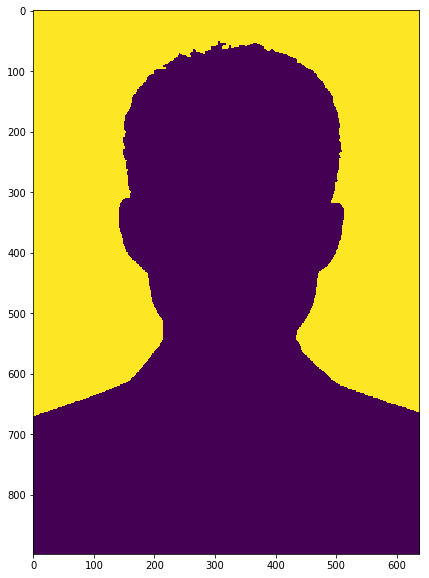

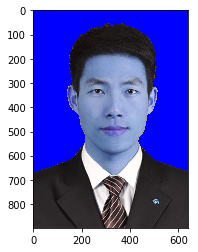

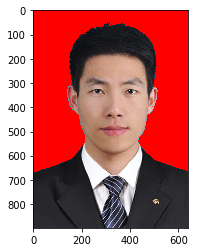

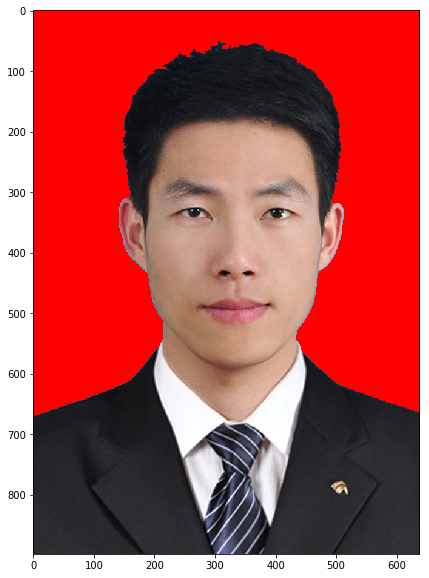

In [58]:
#img_photo = cv2.imread(r'C:\Users\24586\Pictures\Sketchpad.png', 1)
img_photo = cv2.imread(r'C:\Users\24586\Pictures\Saved Pictures\wutao.jpg',1)
rows, cols, ch = img_photo.shape
my_show(img_photo,size=(10,10))
img_hsv = cv2.cvtColor(img_photo, cv2.COLOR_BGR2HSV)
lower_hue = np.array([78, 43, 46])
upper_hue = np.array([114, 255, 255])
mask_hsv = cv2.inRange(img_hsv, lower_hue, upper_hue)
plt.figure(figsize=(10,10))
plt.imshow(mask_hsv)
plt.show()
#腐蚀膨胀（闭运算，先腐蚀后膨胀）
erode = cv2.erode(mask_hsv, None, iterations=2)
plt.figure(figsize=(10,10))
plt.imshow(erode)
plt.show()

dilate = cv2.dilate(erode, None, iterations=1)
plt.figure(figsize=(10,10))
plt.imshow(dilate)
plt.show()
for i in range(rows):
    for j in range(cols):
        if dilate[i, j] == 255:
            img_photo[i, j] = (0, 0, 255)
plt.imshow(img_photo)
plt.show()
imgc_photo = cv2.cvtColor(img_photo, cv2.COLOR_BGR2RGB)
plt.imshow(imgc_photo)
plt.show()
my_show(img_photo, size=(10, 10))

500 500


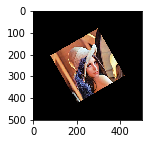

In [24]:
#img_ori = img_ori[0:500, 0:300]
print(img_ori.shape[1], img_ori.shape[0])
M = cv2.getRotationMatrix2D((img_ori.shape[1] / 2, img_ori.shape[0] / 2), 30, 0.5) #center, angle, scale
img_rotate = cv2.warpAffine(img_ori, M, (img_ori.shape[0], img_ori.shape[1]))
my_show(img_rotate)

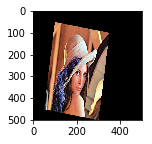

In [25]:
#affine transform
rows, cols, ch = img_ori.shape #行列，通道数
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.7, rows*0.2], [cols * 0.1, rows * 0.9]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_ori, M, (cols, rows))
my_show(dst)

In [26]:
#perspective transform
import random
def random_warp(img, row, col):
    height, width, channels = img.shape
    
    #warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height -1)
    
    dx1 = random.randint(-random_margin, random_margin)
    dy1 =  random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height -1)
    
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img_ori, M_warp, (width, height))
    return M_warp, img_warp

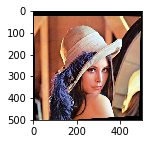

In [27]:
M_warp, img_warp = random_warp(img_ori, img_ori.shape[0], img_ori.shape[1])
my_show(img_warp)